# Crystal Precipitation

In [ ]:
using Plots

In [3]:
# physical constants

# from gibbs-thompson relation
gamma = 4 * 10e-9
# mass density of solid phase of AgBr
rho = 6473

k_g = 5e-2
k_d = 5e-2

d = 1
g = 1
# g = 2

sat_conc = 4 * 10e-6 # kmol/m^3
# note we must have initial concentration above saturation concentration,
# otherwise all the crystals would dissolve!
initial_conc = 1.05 * sat_conc # kmol / m^3
# initial length of single crystal
x_init = 10e-7 # m
# geometric parameter connecting length cubed to crystal volume
# cubes -> 1
# spheres -> 4/3π
k_v = 1
# "number per unit volume"
mu = 10e19

1.0e20

In [4]:
total_ag_br = initial_conc + mu * k_v * x_init ^ 3

100.00004199999998

In [6]:
G = function (x)
    conc = total_ag_br - mu * x ^ 3
    rhs = sat_conc * exp(gamma / x)
    
    delta = conc - rhs
    
    return delta > 0 ? k_g * delta : k_d * delta
end

#1 (generic function with 1 method)

In [7]:
G(x_init)

1.8378451287032085e-8

In [8]:
G(10e-5)

-4.9999949999999e6

In [76]:
range(0, length=100, step=0.1)

0.0:0.1:9.9

In [78]:
plot_crystal_size = function(xinit::Float64, dt::Float64=1e-8, steps::Int64=100)
    x = zeros(steps)
    x[1] = xinit

    for step=2:steps
        x[step] = x[step - 1] + dt * G(x[step - 1])
    end
    
    t = range(0, step=dt, length=steps)

    plot(t, x)
end

#9 (generic function with 3 methods)

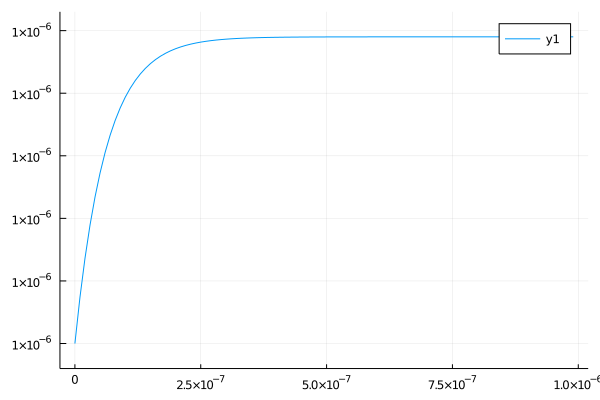

In [79]:
plot_crystal_size(x_init)

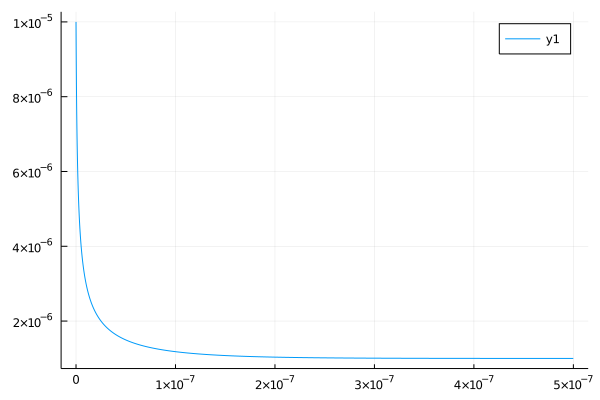

In [80]:
plot_crystal_size(x_init * 10, 1e-10, 5000)

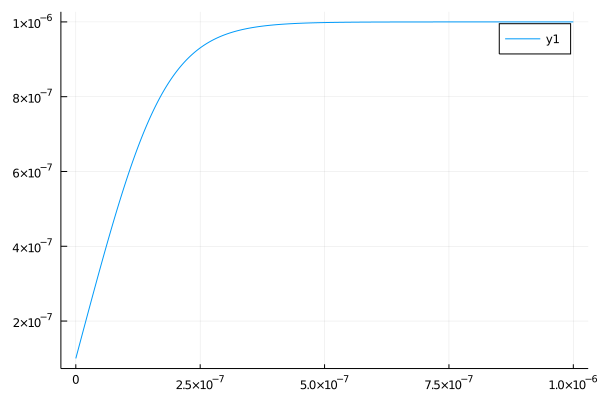

In [81]:
plot_crystal_size(x_init / 10, 1e-10, 10000)